In [4]:
RUN_UI = False

#User Interface (START HERE!)

##Initialize

In [5]:
#Import TensorFlow and other necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tkinter import filedialog as fd
from PIL import Image
import os.path
drive_path = "/content/drive/MyDrive/Colab Notebooks/Dogs and Cats recognition"
drive_link = "https://drive.google.com/uc?id=1-E_btGl1T42hdImROODvgcfArXVj7XaL"
"""
# from google.colab import drive
# drive.mount('/content/drive/folders/1qmqM93O5RJRowE24pqS4K4PQxdoMr8gU')
# drive.mount("https://drive.google.com/drive/folders/1qmqM93O5RJRowE24pqS4K4PQxdoMr8gU")
"""
local_path = "saved_model.pb"
if RUN_UI:
  model = None
  if os.path.isfile(drive_path):
    # File is located in a mounted Google Drive folder.
    model = keras.models.load_model(drive_path)
  else:
    import gdown
    # File should be located in current Google Colab instance.
    if not os.path.isfile(local_path):
      # Download existing "saved_model.pb" file from our Google Drive.
      gdown.download(drive_link, local_path, quiet=False)
    model = keras.models.load_model(local_path)
  filename = fd.askopenfilename()
  try: 
      img  = Image.open(filename)
  except IOError:
    print(f"File Not Found: {filename}")

#Developer Interface

In [7]:
#Import TensorFlow and other necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
# Assigin Path to training and testing data
data_dir_train = '/content/drive/MyDrive/Colab Notebooks/Dogs and Cats recognition/dataset'
data_dir_test = '/content/drive/MyDrive/Colab Notebooks/Dogs and Cats recognition/dataset'

In [9]:
#Load data using a Keras utility

#Define parameters for the loader
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(data_dir_train,validation_split=0.2,
                                                      subset="training",seed=123,image_size=(img_height, img_width),batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir_train,validation_split=0.2,
                                                      subset="validation",seed=123,image_size=(img_height, img_width),batch_size=batch_size)

Found 2023 files belonging to 2 classes.
Using 1619 files for training.
Found 2023 files belonging to 2 classes.
Using 404 files for validation.


In [10]:
#Printing classname
class_names = train_ds.class_names
print(class_names)


['cats', 'dogs']


(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)


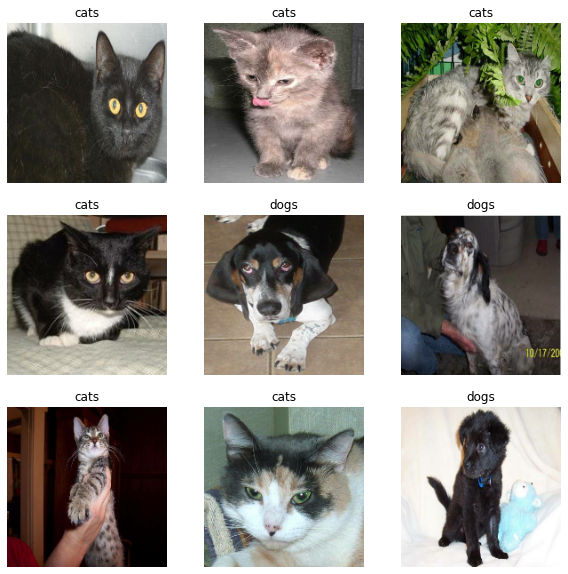

In [11]:
#Visualize the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.title(class_names[labels[i]])
    plt.axis("off")

    for image_batch, labels_batch in train_ds:
      print(image_batch.shape)
      print(labels_batch.shape)
      break

In [12]:
#Normalize
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
#pixel values are now in [0,1]
print(np.min(first_image), np.max(first_image))


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


0.005323821 0.96466947


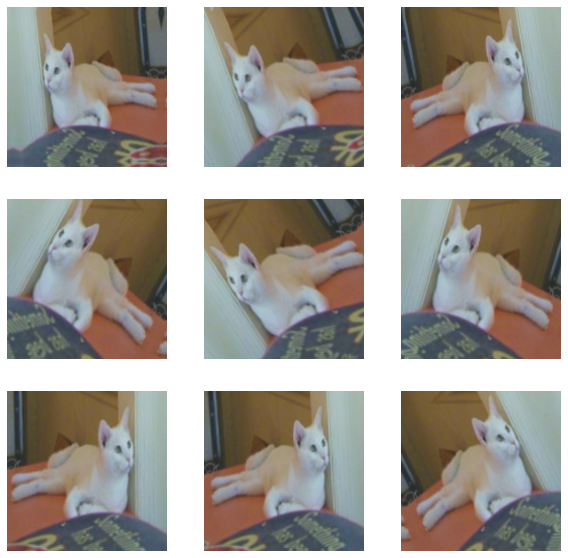

In [13]:
#Data Augmentation
data_augmentation = keras.Sequential([layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),layers.RandomRotation(0.1),layers.RandomZoom(0.1)])
layers.RandomRotation(0.1)
layers.RandomZoom(0.1)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")
          
       

In [14]:
#Create the model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
num_classes = len(class_names)
model = Sequential([data_augmentation,layers.Rescaling(1./255),layers.Conv2D(16, 3, padding='same', activation='relu'),layers.MaxPooling2D(),
                   layers.Conv2D(32, 3, padding='same', activation='relu'),layers.MaxPooling2D(),layers.Conv2D(64, 3, padding='same', activation='relu'),
                   layers.MaxPooling2D(),layers.Conv2D(64, 3, padding='same', activation='relu'),layers.MaxPooling2D(), layers.Dropout(0.2),layers.Flatten(),
                   layers.Dense(128, activation='relu'), layers.Dense(num_classes, name="outputs")])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])   
                  
                      
#Show model    
model.summary()
        

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [15]:
#Train the model
from keras.callbacks import ModelCheckpoint,LearningRateScheduler,EarlyStopping,ReduceLROnPlateau,TensorBoard
import os

#CHECKPOINTS:
drpath = '/content/drive/MyDrive/Colab Notebooks/Dogs and Cats recognition'
checkpoint_path = drpath+'cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)


cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1,monitor='val_loss',
                                              save_best_only=True,mode='min')

es_callback = EarlyStopping(monitor='val_loss',min_delta=0,patience=10,verbose=1)
      
epochs = 50
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs,callbacks=[cp_callback, es_callback])

Epoch 1/50


51/51 [==============================] - ETA: 0s - loss: 0.7080 - accuracy: 0.5170
Epoch 1: val_loss improved from inf to 0.71563, saving model to /content/drive/MyDrive/Colab Notebooks/Dogs and Cats recognitioncp.ckpt
51/51 [==============================] - 169s 3s/step - loss: 0.7080 - accuracy: 0.5170 - val_loss: 0.7156 - val_accuracy: 0.4926
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.6875 - accuracy: 0.5559
Epoch 2: val_loss improved from 0.71563 to 0.67294, saving model to /content/drive/MyDrive/Colab Notebooks/Dogs and Cats recognitioncp.ckpt
51/51 [==============================] - 48s 929ms/step - loss: 0.6875 - accuracy: 0.5559 - val_loss: 0.6729 - val_accuracy: 0.6015
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.6651 - accuracy: 0.6022
Epoch 3: val_loss improved from 0.67294 to 0.66679, saving model to /content/drive/MyDrive/Colab Notebooks/Dogs and Cats recognitioncp.ckpt
51/51 [==============================] - 46s 901ms/

In [18]:
#Save the model after training
!mkdir -p saved_model
model.save('/content/drive/MyDrive/Colab Notebooks/Dogs and Cats recognitionsaved_model/my_model.h5') 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


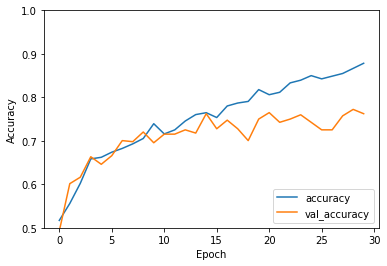

In [16]:
#Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
